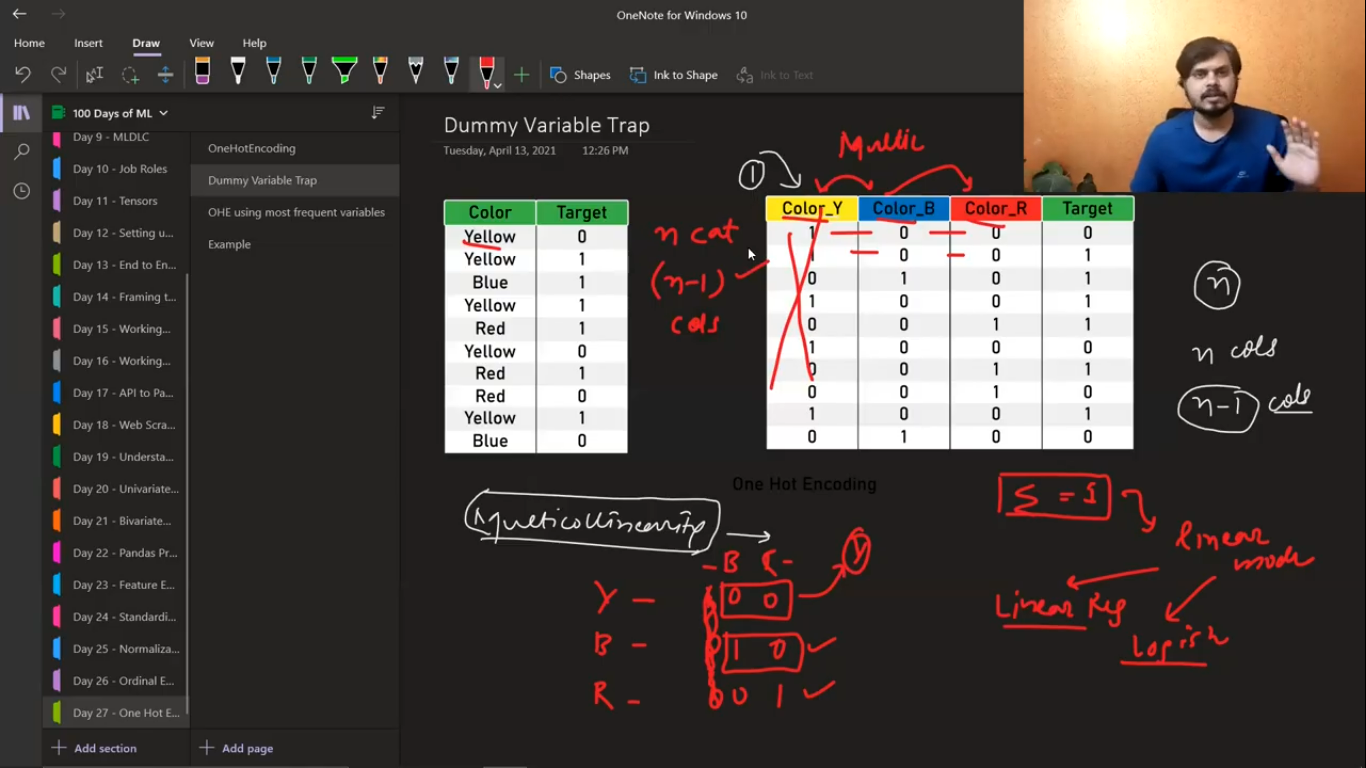

In [1]:
# "dummy variable trap" : remove first column in OHE
# multi colinearity problem occurs due to dummy variables

In [2]:
# OHE using most frequent variables

#like car brands col have so many cars but most frequent are only 3 or 4
#its nominal categorical data bcoz it cant be ordered... 
#if we apply OHE then it will create 1 column for each car & end up with so many columns
#we can keep most frequent categories & keep rest in "others" column
#

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('cars.csv')

In [5]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [6]:
df['brand'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [7]:
df['brand'].nunique()

32

In [8]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [9]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

# OHE using pandas

In [10]:
pd.get_dummies(df,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


In [11]:
#fuel had 4 categories so 4 columns
#owner had 5 categories so 5 columns

# n-1 OHE (solving multilinearity problem)

In [12]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


# OHE using sklearn

In [13]:
#you dnt use pandas for ml projects
#bcoz it dsnt remember dummies
#but sklearn does

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [15]:
X_train

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner
...,...,...,...,...
3606,Ford,35000,Diesel,First Owner
5704,Maruti,120000,Petrol,First Owner
6637,Tata,15000,Petrol,First Owner
2575,Maruti,32500,Diesel,Second Owner


In [16]:
X_test

,brand,km_driven,fuel,owner
606,Hyundai,80000,Petrol,First Owner
7575,Mahindra,70000,Diesel,Second Owner
7705,Toyota,68089,Petrol,First Owner
4305,Hyundai,70000,Petrol,Second Owner
2685,Mahindra,97000,Diesel,Second Owner
...,...,...,...,...
1537,Maruti,50000,Diesel,First Owner
6153,Maruti,111000,Petrol,First Owner
7954,Maruti,40000,Petrol,First Owner
2310,Hyundai,80000,Petrol,Second Owner


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder(drop='first',dtype=np.int32)

#ohe = OneHotEncoder(drop='first',sparse=False)
#sparse false will return no array so we dnt hv to run toarray() in line# 21

In [19]:
#since you are not applying OHE on all columns
#only fuel & owner will be OHE so we have to extract these cols 
#& join them back after applying OHE

In [20]:
ohe.fit_transform(X_train[['fuel','owner']])

<6502x7 sparse matrix of type '<class 'numpy.int32'>'
	with 8746 stored elements in Compressed Sparse Row format>

In [21]:
#to see sparse matrix

X_train_new = ohe.fit_transform(X_train[['fuel','owner']]).toarray()
X_train_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [22]:
X_test_new = ohe.transform(X_test[['fuel','owner']]).toarray()
X_test_new

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [23]:
#join them back after applying OHE

In [24]:
X_train[['brand','km_driven']].values

array([['Hyundai', 35000],
       ['Jeep', 60000],
       ['Hyundai', 25000],
       ...,
       ['Tata', 15000],
       ['Maruti', 32500],
       ['Isuzu', 121000]], dtype=object)

In [25]:
#now we have 2 numpy arrays, we need to join them together

In [26]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

In [27]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new)).shape

(6502, 9)

# OHE on brands column

In [29]:
df['brand'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [30]:
counts = df['brand'].value_counts()

In [32]:
df['brand'].nunique()
threshold = 100

In [33]:
counts[counts <= threshold].index

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object')

In [34]:
repl = counts[counts <= threshold].index

In [37]:
pd.get_dummies(df['brand'].replace(repl,'uncommon')).sample(10)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
6428,0,0,0,0,0,0,0,0,0,1,0,0,0
3250,0,0,0,0,0,0,0,0,0,0,1,0,0
6397,0,0,1,0,0,0,0,0,0,0,0,0,0
3120,0,0,0,0,0,1,0,0,0,0,0,0,0
6895,0,0,0,0,0,1,0,0,0,0,0,0,0
5094,0,0,0,0,0,0,0,0,0,0,1,0,0
5062,0,0,0,0,0,1,0,0,0,0,0,0,0
3651,0,0,0,0,0,0,1,0,0,0,0,0,0
8093,0,0,0,0,1,0,0,0,0,0,0,0,0
4173,0,0,0,0,1,0,0,0,0,0,0,0,0
